In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'bluebear78'
os.environ['KAGGLE_KEY'] = '39d305f791ce074d3a7f8d5630fecba2'

In [116]:
!rm '*.*'

rm: cannot remove '*.*': No such file or directory


In [119]:
!kaggle datasets download -d abcsds/pokemon
!unzip "*.zip"

pokemon.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pokemon.zip
replace Pokemon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Pokemon.csv             


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv("Pokemon.csv")

In [122]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [123]:
df[df['Legendary']==False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


In [124]:
df[df['Legendary']==True]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


전설인지 아닌지 구분하기

In [125]:
rank_table = df.pivot(index='Name',columns=['Generation'],values='Total')
rank_table

Generation,1,2,3,4,5,6
Name,,,,,,
Abomasnow,NaN,NaN,NaN,494.0,NaN,NaN
AbomasnowMega Abomasnow,NaN,NaN,NaN,594.0,NaN,NaN
Abra,310.0,NaN,NaN,NaN,NaN,NaN
Absol,NaN,NaN,465.0,NaN,NaN,NaN
AbsolMega Absol,NaN,NaN,565.0,NaN,NaN,NaN
...,...,...,...,...,...,...
Zoroark,NaN,NaN,NaN,NaN,510.0,NaN
Zorua,NaN,NaN,NaN,NaN,330.0,NaN
Zubat,245.0,NaN,NaN,NaN,NaN,NaN


세대별로 나눠서 보자

In [126]:
rank_table_gen1 = df[df['Generation']==1]

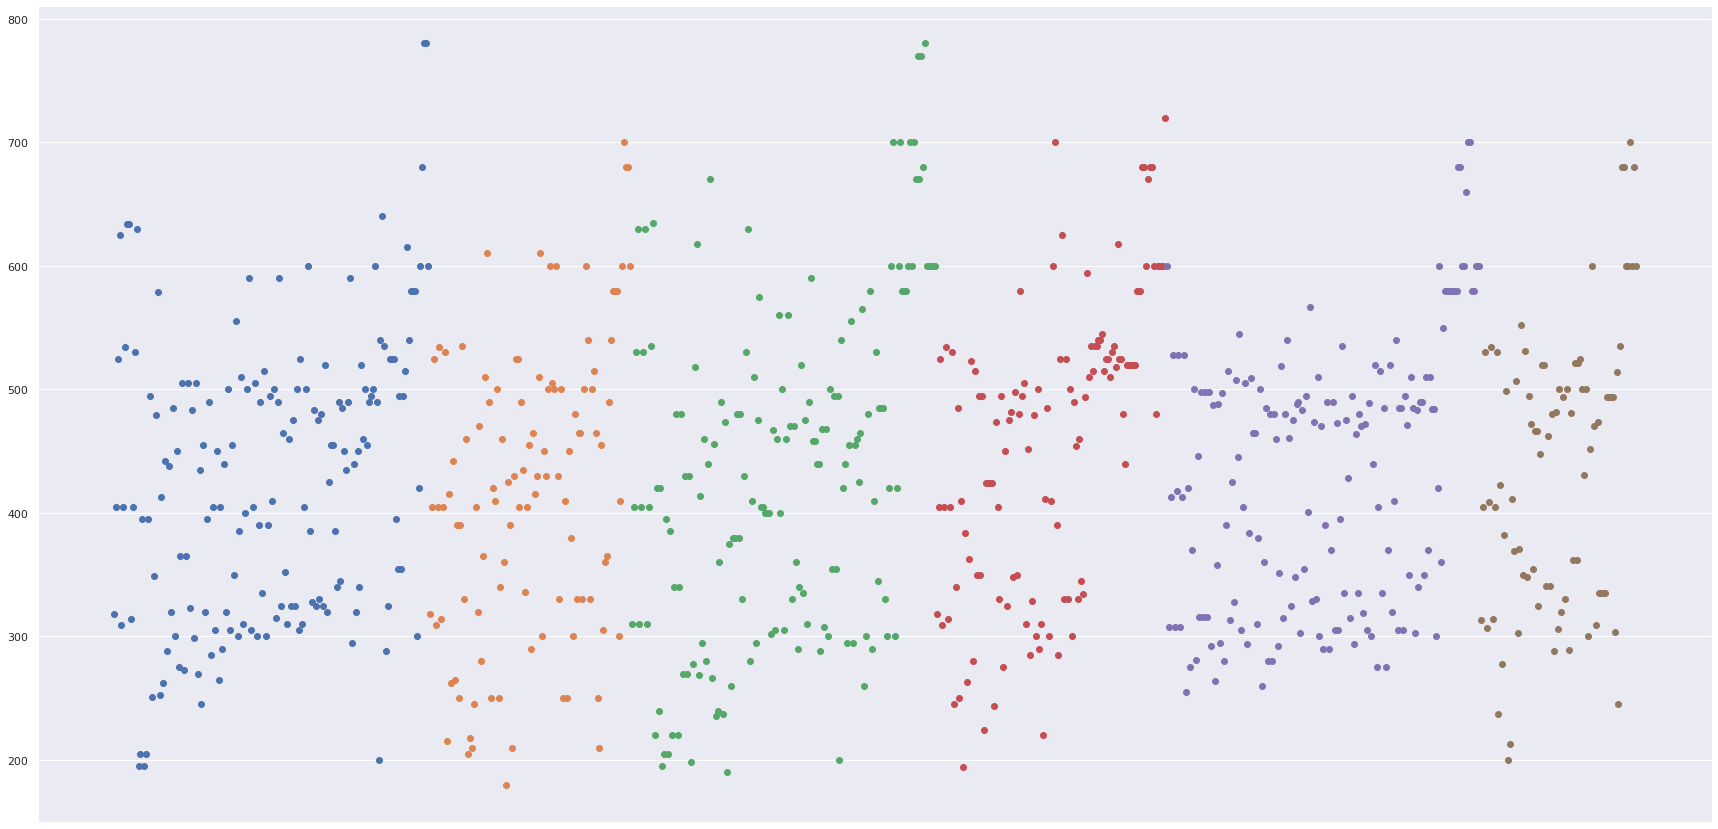

In [127]:
gen = [1,2,3,4,5,6]
colors = ['r','g','b','c','m','y']

for idx,c in enumerate(gen):
  rank_table_gen1 = df[df['Generation']==c]
  x_data = rank_table_gen1['Name']
  y_data = rank_table_gen1['Total']
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  plt.plot(x_data,y_data,'o')

plt.show()



세대 별 총합 능력치 차이는 크게 없다

In [128]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

type 2는 비어있는 값도 있음. Type 1을 one-hot으로 처리하고 거기에 값을 넣어주는 방식을 사용하기로함

In [129]:
df['Type1'] = df['Type 1']
df['Type2'] = df['Type 2']
df.drop(['Type 1','Type 2'],axis=1,inplace=True)

In [130]:
df.isna().sum()

#               0
Name            0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Type1           0
Type2         386
dtype: int64

In [131]:
len(df['Type1'].value_counts())

18

In [132]:
len(df['Type2'].value_counts())

18

2개의 값이 같음

In [133]:
type_dummies = pd.get_dummies(df.Type1)
type2_dummies = pd.get_dummies(df.Type2)

In [134]:
type_dummies + type2_dummies

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
796,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
797,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
798,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [135]:
df = pd.concat([df,type_dummies + type2_dummies],axis=1)

In [136]:
df.drop(['Type1','Type2'],axis=1,inplace=True)
df.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,318,45,49,49,65,65,45,1,...,0,1,0,0,0,1,0,0,0,0
1,2,Ivysaur,405,60,62,63,80,80,60,1,...,0,1,0,0,0,1,0,0,0,0
2,3,Venusaur,525,80,82,83,100,100,80,1,...,0,1,0,0,0,1,0,0,0,0
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,...,0,1,0,0,0,1,0,0,0,0
4,4,Charmander,309,39,52,43,60,50,65,1,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df.isna().sum()

#             0
Name          0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
Bug           0
Dark          0
Dragon        0
Electric      0
Fairy         0
Fighting      0
Fire          0
Flying        0
Ghost         0
Grass         0
Ground        0
Ice           0
Normal        0
Poison        0
Psychic       0
Rock          0
Steel         0
Water         0
dtype: int64

In [138]:
df.columns

Index(['#', 'Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary', 'Bug', 'Dark', 'Dragon', 'Electric',
       'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground',
       'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

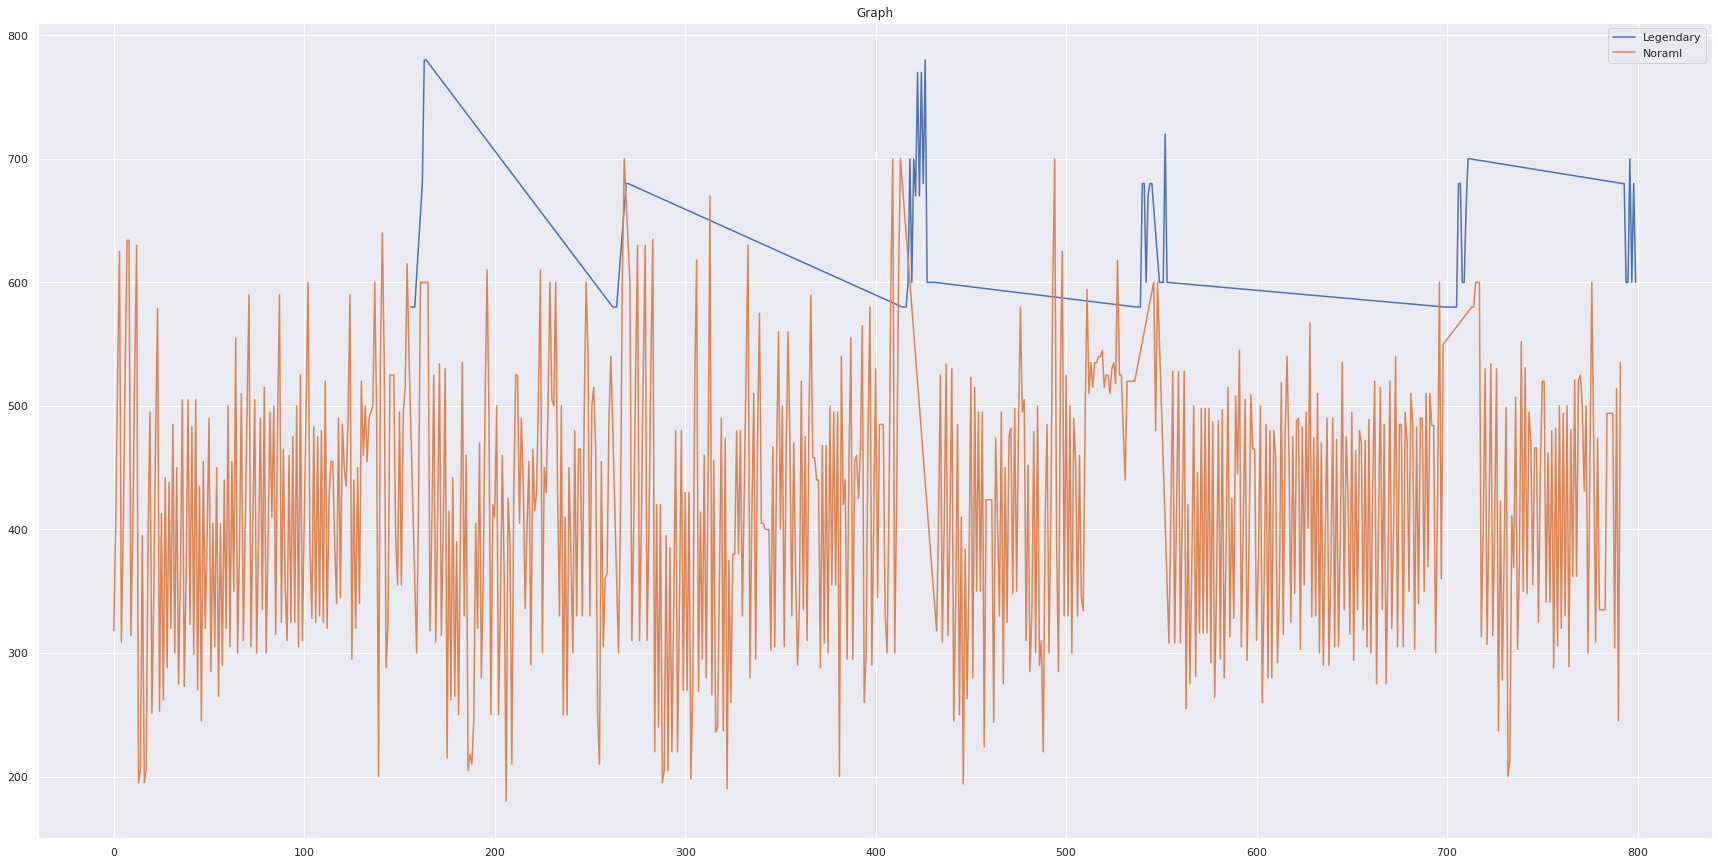

In [139]:
x = df[df['Legendary']==True]['Total']
y = df[df['Legendary']==False]['Total']
 
plt.plot(x,label="Legendary")
plt.plot(y,Label="Noraml")

plt.legend(loc='lower right')
plt.title('Graph')            #차트 제목
plt.legend()                  #디폴트 위치에 범례 생성 
plt.show()


총합 능력치만으로도 충분히 예측 가능할듯?

In [140]:
df.drop(['Name',"#"],axis=1,inplace=True)

In [141]:
df.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy',
       'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice',
       'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   Legendary   800 non-null    bool 
 9   Bug         800 non-null    uint8
 10  Dark        800 non-null    uint8
 11  Dragon      800 non-null    uint8
 12  Electric    800 non-null    uint8
 13  Fairy       800 non-null    uint8
 14  Fighting    800 non-null    uint8
 15  Fire        800 non-null    uint8
 16  Flying      800 non-null    uint8
 17  Ghost       800 non-null    uint8
 18  Grass       800 non-null    uint8
 19  Ground      800 non-null    uint8
 20  Ice         800 non-null    uint

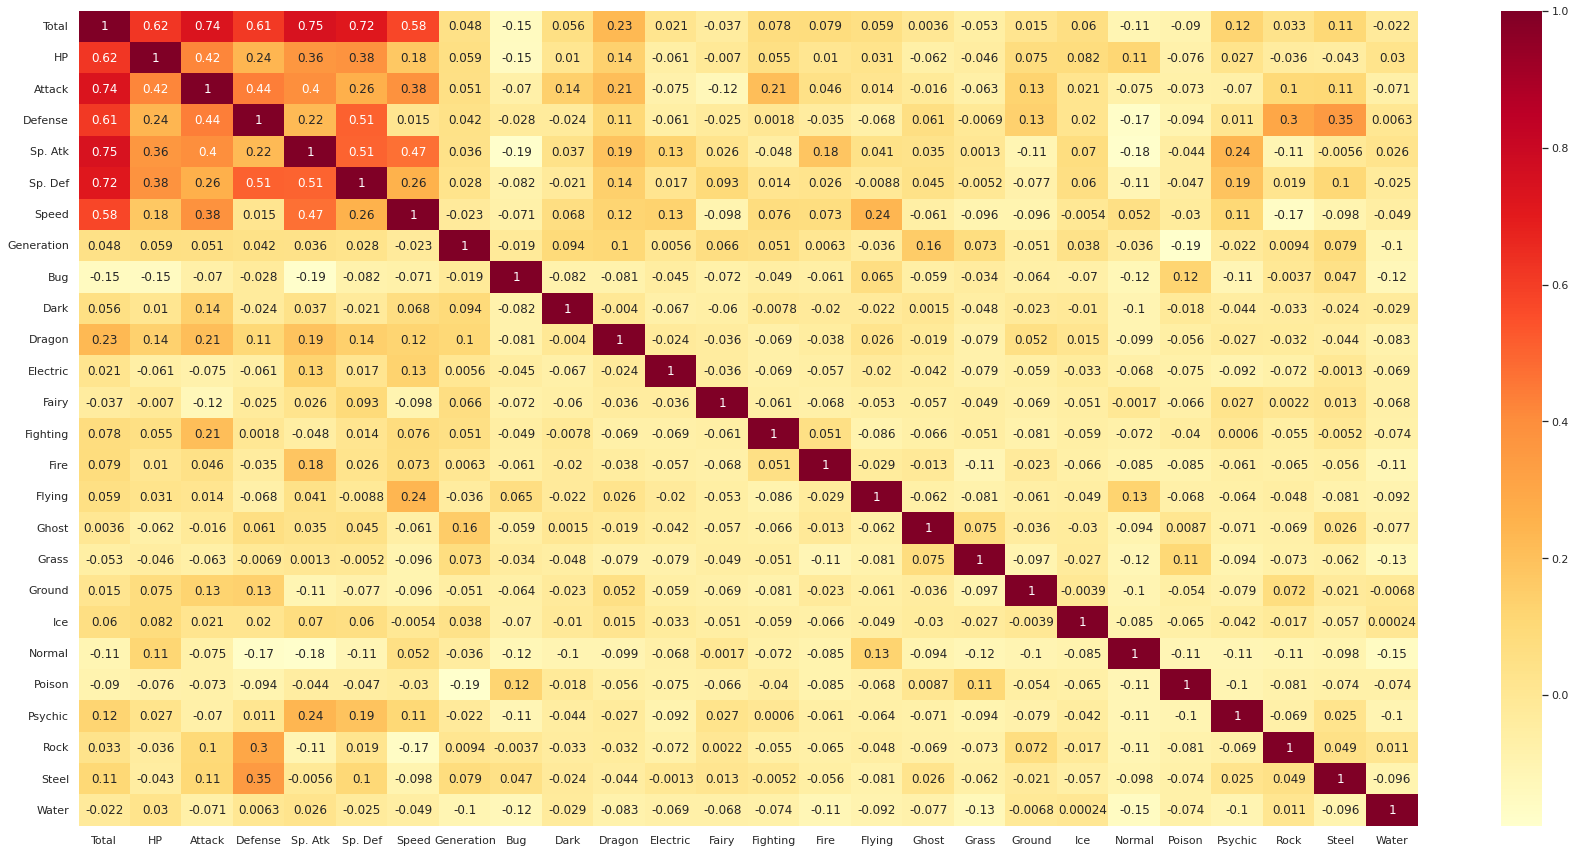

In [143]:
sns.set(rc = {'figure.figsize':(30,15)})
sns.heatmap(df.drop('Legendary',axis=1).corr(),annot=True,cmap='YlOrRd')

In [144]:
df.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy',
       'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice',
       'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

In [145]:
df_backup = df

In [146]:
df.drop(["Total"],axis=1,inplace=True)
df_backup.drop(["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"],axis=1,inplace=True)

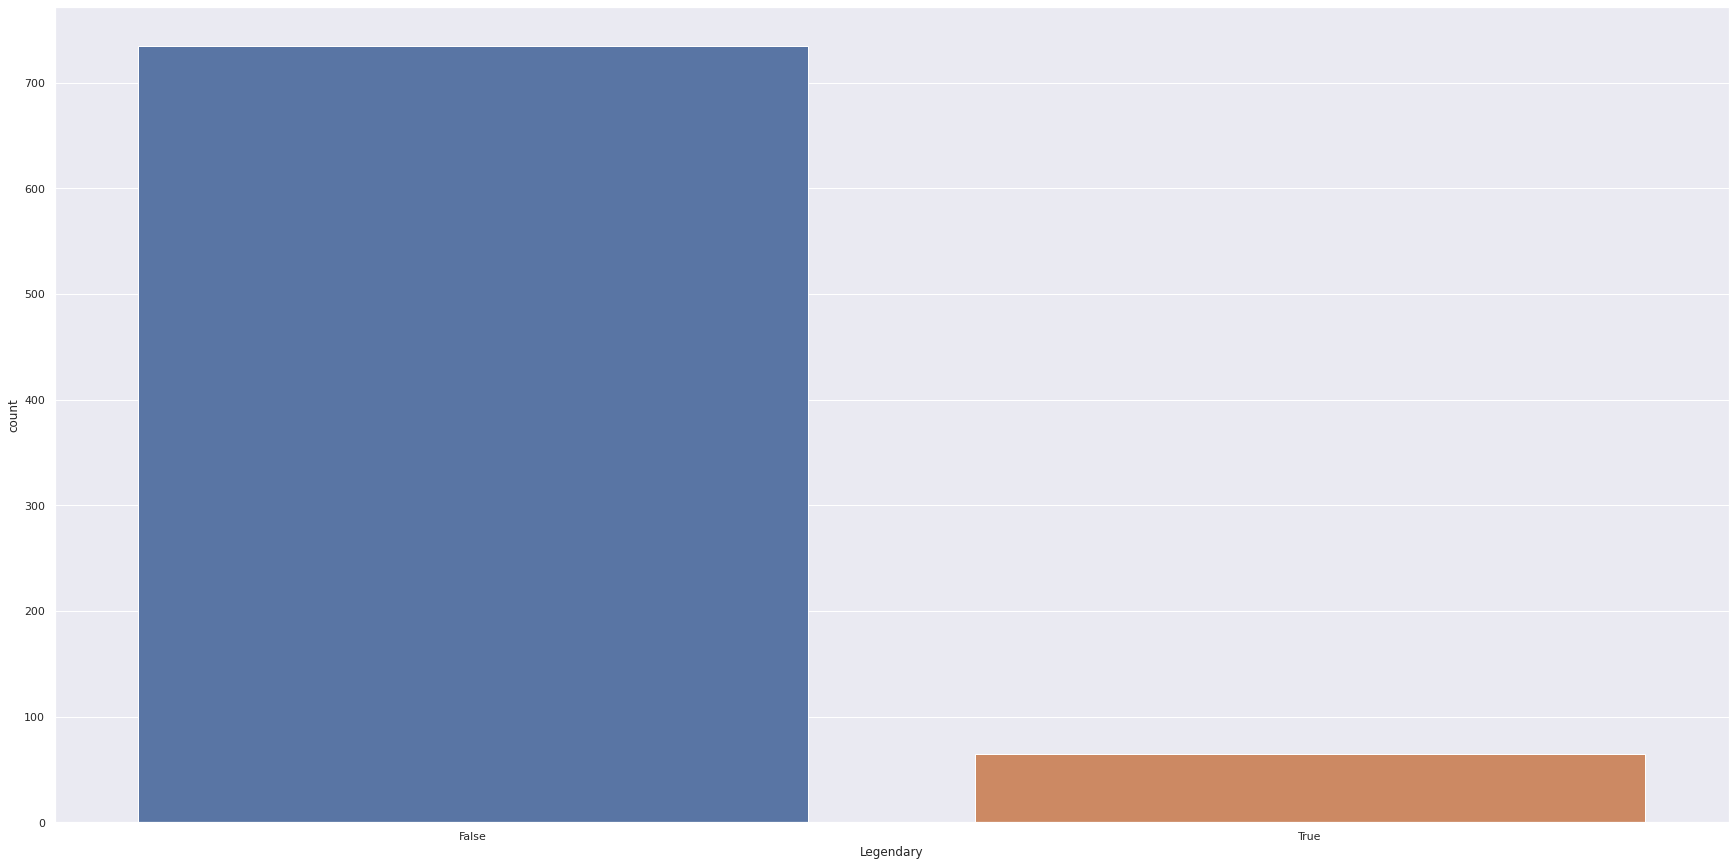

In [147]:
sns.countplot(x='Legendary',data=df)

legendary 아닌게 너무 많은데...

In [148]:
df_train = df.drop(['Legendary'],axis=1)
df_test = df['Legendary']

In [149]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

def preprocessingX(input_df):
    r = RobustScaler().fit_transform(input_df)
    r = MinMaxScaler().fit_transform(r)
    #r = PCA(n_components=3).fit_transform(r)
    return r


In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [151]:
rf_grid = GridSearchCV(RandomForestClassifier(), {'n_estimators':[100], 
                                            'max_depth':[5, 10, 13], 
                                            'min_samples_split': [2, 5, 10], 
                                            'random_state':[42],
                                           }, cv=10, scoring='accuracy')
rf_grid.fit(df_train, df_test.values.ravel())


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 13],
                         'min_samples_split': [2, 5, 10], 'n_estimators': [100],
                         'random_state': [42]},
             scoring='accuracy')

In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
rf_best = rf_grid.best_estimator_
#knn_best = knn_grid.best_estimator_

print('----')
for m in [rf_best]:
    # y 가 2차원 어레이일 때 문제가 생겨서, ravel로 수정해줌
    print(m.__class__)
    print("train: {}".format(m.score(df_train, df_test.values.ravel())))
    print("----")

print( cross_val_score(rf_best, df_train, df_test.values.ravel(),cv=10,scoring='accuracy') )


----
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
train: 0.92375
----
[0.925  0.925  0.925  0.925  0.925  0.9125 0.9125 0.9125 0.9125 0.9125]
